# Test Paramak Dependency

In [1]:
# Impor semua paket yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import openmc
import paramak
import openmc_dagmc_wrapper as nparamak
import neutronics_material_maker as nmm

from jupyter_cadquery.cadquery import (PartGroup, Part, Edges, Faces, Vertices, show)
from jupyter_cadquery import set_sidecar, set_defaults, reset_defaults

Overwriting auto display for cadquery Workplane and Shape


In [2]:
red_part = paramak.ExtrudeMixedShape(
    points=[
        (-89.0, -50.0, 'straight'),
        (-18.0, -50.0, 'straight'),
        (30.0, 30.0, 'straight'),
        (-12.0, 100.0, 'circle'),
        (88.0, -50.0, 'circle'),
    ],
    distance=10,
    color=(1,0,0),
    name='red_part',
    material_tag='red_part_mat',
    stp_filename='red_part.stp',
    stl_filename='red_part.stl',
)

In [3]:
grey_part = paramak.ExtrudeMixedShape(
    points=[
        (-96.5, -27.0, 'straight'),
        (-30.0, -27.0, 'straight'),
        (3.0, 30.0, 'straight'),
        (-30.0, 87.0, 'straight'),
        (-50.0, 87.0, 'straight'),
        (-30.0, 87.0, 'circle'),
        (-97.0, 30.0, 'circle'),
    ],
    distance=10,
    color=(0.5,0.5,0.5),
    name='grey_part',
    material_tag='grey_part_mat',
    stp_filename='grey_part.stp',
    stl_filename='grey_part.stl',
)

In [4]:
both_parts = paramak.Reactor([red_part, grey_part])

In [5]:
# both_parts.export_stp(output_folder='0-trial-paramak-openmc')
both_parts.export_stp()

Saved file as  graveyard.stp


['red_part.stp', 'grey_part.stp', 'graveyard.stp']

In [6]:
# both_parts.export_h5m(output_folder='0-trial-paramak-openmc')
both_parts.export_h5m()

Saved file as  red_part.stl
Saved file as  grey_part.stl
Saved file as  graveyard.stl


'dagmc.h5m'

In [8]:
red_part_mat = openmc.Material(name="red_part_mat")
red_part_mat.add_nuclide('U235', 1.0, 'ao')
red_part_mat.set_density('g/cc', 11)

grey_part_mat = openmc.Material(name="grey_part_mat")
grey_part_mat.add_nuclide('H1', 2.0, 'ao')
grey_part_mat.add_nuclide('O16', 1.0, 'ao')
grey_part_mat.set_density('g/cc', 1.0)
grey_part_mat.add_s_alpha_beta('c_H_in_H2O')

mats = openmc.Materials([red_part_mat, grey_part_mat])
mats.export_to_xml()

In [9]:
dag_universe = openmc.DAGMCUniverse(filename="dagmc.h5m")
geom = openmc.Geometry(root=dag_universe)
geom.export_to_xml()

In [10]:
source = openmc.Source()
source.space = openmc.stats.Point((0, 50, 0))
source.energy = openmc.stats.Discrete([14e6], [1])
source.angle = openmc.stats.Isotropic()

In [11]:
settings = openmc.Settings()
settings.dagmc = True
settings.batches = 30
settings.inactive = 5
settings.particles = 10000
settings.run_mode = 'eigenvalue'
settings.source = source
settings.export_to_xml()

In [12]:
tally = openmc.Tally()
tally.scores = ['total']
tally.filters = [openmc.CellFilter(1)]
tallies = openmc.Tallies([tally])
tallies.export_to_xml()

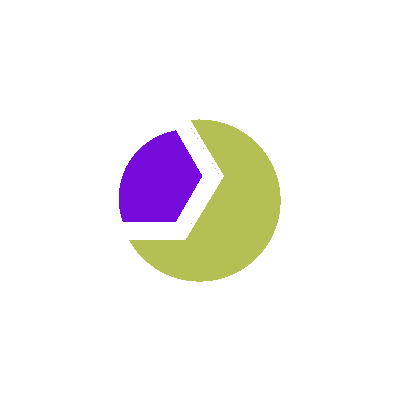

In [13]:
p = openmc.Plot()
p.basis = 'xz'
p.width = (500.0, 500.0)
p.pixels = (400, 400)
p.color_by = 'material'
openmc.plot_inline(p)

In [14]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################